### 原始数据统计量
- 计算我们使用的数据的基本统计量

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import sys
sys.path.append('C:/Users/Administrator/Desktop/Repositories/Low-Frequency-Spread-Estimator')
sys.path.append('C:/Users/18316/Desktop/Repositories/Low-Frequency-Spread-Estimator')
sys.path.append('C:/Users/Handsome Bad Guy/Desktop/Repositories/Low-Frequency-Spread-Estimator')
sys.path.append('C:/Users/Windows11/Desktop/Repositories/Low-Frequency-Spread-Estimator')

from SpreadEstimator.SpreadEstimator import SpreadEstimator
from mytools.AutoTester import AutoTester
from time import time

import warnings
warnings.filterwarnings("ignore")

### 计算基本统计量
- 平均收盘价、所有平均spread

In [2]:
se = SpreadEstimator(market='SP500')

In [12]:
np.argmax(np.nanmean(se.data.spread_dic['spread'], axis=0))

336

In [15]:
np.nanmean(se.data.spread_dic['spread'], axis=0)[336]

128.98512

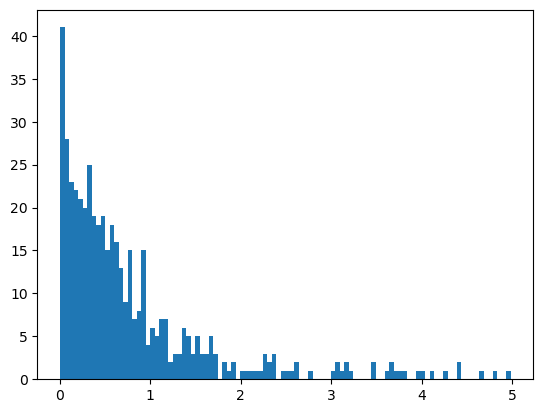

In [22]:
tmp = np.nanmean(se.data.spread_dic['spread'], axis=0)
plt.hist(tmp[tmp<5], bins=100)
plt.show()

In [27]:
np.nanmean(np.nanmean(se.data.spread_dic['spread'], axis=0)[np.nanmean(se.data.spread_dic['spread'], axis=0)<5])

0.7923932

In [25]:
np.nansum(np.nanmean(se.data.spread_dic['spread'], axis=0)>5)

22

In [9]:
univ = (se.data.data_dic['volume'] > 0) & (se.data.spread_dic['spread']<50)  # 当天有交易
print('mean close: {:.2f}'.format(np.mean(se.data.data_dic['close'][univ])))
print('mean spread: {:.4f}'.format(np.nanmean(se.data.spread_dic['spread'][univ])))
print('mean rela_spread: {:.4f}'.format(np.nanmean(se.data.spread_dic['rela_spread'][univ])*100))
print('mean vol_wtd_rel_bas: {:.4f}'.format(np.nanmean(se.data.spread_dic['w_rela_spread'][univ])*100))

mean close: 130.82
mean spread: 1.2282
mean rela_spread: 0.6698
mean vol_wtd_rel_bas: 1.1187


In [10]:
def cal_q(s, q):
    s = s[~np.isnan(s)]
    return np.sort(s)[int(q * len(s))]

In [11]:
s = se.data.data_dic['close'][univ]
print('close: {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(cal_q(s, 0.01), 
                             cal_q(s, 0.25), cal_q(s, 0.5), cal_q(s, 0.75), cal_q(s, 0.99)))
s = se.data.spread_dic['spread'][univ]
print('spread: {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}'.format(cal_q(s, 0.01), 
                             cal_q(s, 0.25), cal_q(s, 0.5), cal_q(s, 0.75), cal_q(s, 0.99)))
s = se.data.spread_dic['rela_spread'][univ] * 100
print('relative_spread: {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}'.format(cal_q(s, 0.01), 
                             cal_q(s, 0.25), cal_q(s, 0.5), cal_q(s, 0.75), cal_q(s, 0.99)))
s = se.data.spread_dic['w_rela_spread'][univ] * 100
print('vol_wtd_rel_bas: {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}'.format(cal_q(s, 0.01), 
                             cal_q(s, 0.25), cal_q(s, 0.5), cal_q(s, 0.75), cal_q(s, 0.99)))

close: 7.37, 42.63, 85.16, 149.68, 966.92
spread: 0.0137, 0.1925, 0.4797, 1.0606, 15.2042
relative_spread: 0.0749, 0.3657, 0.5743, 0.8412, 2.2989
vol_wtd_rel_bas: 0.1111, 0.5066, 0.8447, 1.3236, 4.7240
